In [ ]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from pandas_datareader.data import DataReader
from datetime import datetime

import requests
from io import StringIO
from io import BytesIO

from matplotlib.pyplot import figure

In [ ]:
pip install statsmodels 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Bitcoin Data:**

In [ ]:
#import dataset
response_btc = requests.get('https://docs.google.com/spreadsheets/d/1J3F1-OjCNr28bSjr4eBw3ywQaAAImKeFC2Kd-wNgBYo/export?format=csv')
assert response_btc.status_code == 200, 'Wrong status code'
data = response_btc.content
df_btc = pd.read_csv(BytesIO(data))
print(df_btc.shape)

(1794, 6)


In [ ]:
df_btc['Date'] = pd.to_datetime(df_btc['Date'])

#Check null value:
df_btc['Date'].isna().sum()

0

In [ ]:
monthly_btc = df_btc.resample('M', label='right', 
                            closed='right', on='Date').sum().reset_index().sort_values(by='Date')
monthly_btc

,Date,Open,High,Low,Close,Volume
0,2018-01-31,0.0,0.0,0.0,400731.85,0.0
1,2018-02-28,0.0,0.0,0.0,262719.46,0.0
2,2018-03-31,0.0,0.0,0.0,278492.27,0.0
3,2018-04-30,0.0,0.0,0.0,240646.79,0.0
4,2018-05-31,0.0,0.0,0.0,261067.72,0.0
5,2018-06-30,0.0,0.0,0.0,203073.01,0.0
6,2018-07-31,0.0,0.0,0.0,220815.29,0.0
7,2018-08-31,0.0,0.0,0.0,207046.18,0.0
8,2018-09-30,0.0,0.0,0.0,197574.71,0.0
9,2018-10-31,0.0,0.0,0.0,198864.27,0.0


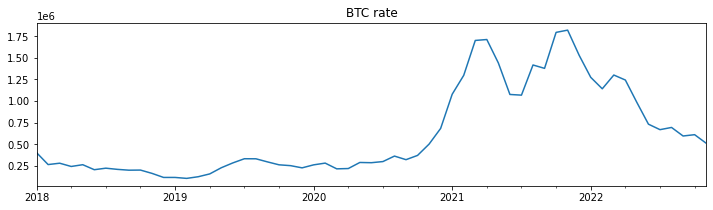

In [ ]:
from datetime import date, timedelta
import calendar
btc_list = monthly_btc['Close'].tolist()

#Draw the graph for S&P 500
date = datetime.now()
month = date.replace(day = calendar.monthrange(date.year, date.month)[1])
#d1 = today.strftime("%m/%d/%y")
btc_m = pd.Series(btc_list, index= pd.date_range("1/1/2018","11/30/2022", freq = "M"))
btc_m.plot(title="BTC rate", figsize= (12,3))


In [ ]:
# Build up Markov Regression model:
mod_btc = sm.tsa.MarkovRegression(btc_m, k_regimes = 3)
res_btc = mod_btc.fit()
res_btc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:               MarkovRegression   Log Likelihood                -817.725
Date:                Fri, 09 Dec 2022   AIC                           1655.450
Time:                        22:18:38   BIC                           1676.225
Sample:                    01-31-2018   HQIC                          1663.560
                         - 11-30-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.872e+05   9.54e-08   3.01e+12      0.000    2.87e+05    2.87e+05
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.202e+05   1.66e-07   1.93e+12      0.000     3.2e+05     3.2e+05
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.223e+06   1.89e-08   6.46e+13      0.000    1.22e+06    1.22e+06
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.433e+10   3.27e-14   2.27e+24      0.000    7.43e+10    7.43e+10
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9751      0.034     28.535      0.000       0.908       1.042
p[1->0]        0.0574      0.111      0.515      0.607      -0.161       0.276
p[2->0]     1.523e-44        nan        nan        nan         nan         nan
p[0->1]     1.231e-12        nan        nan        nan         nan         nan
p[1->1]        0.9426      0.172      5.487      0.000       0.606       1.279
p[2->1]        0.0669      0.058      1.161      0.246      -0.046       0.180
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 2.19e+40. Standard errors may be unstable.
"""

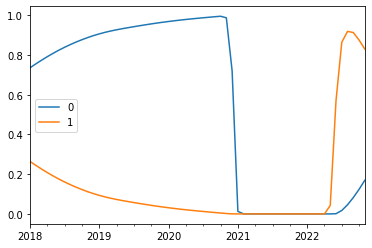

In [ ]:
# Show three regimes:
for i in range(2):
  res_btc.smoothed_marginal_probabilities[i].plot(
      label = f'{i}'
  )
      
  plt.legend()

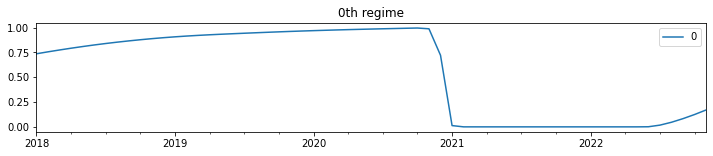

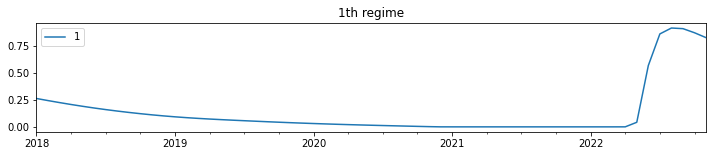

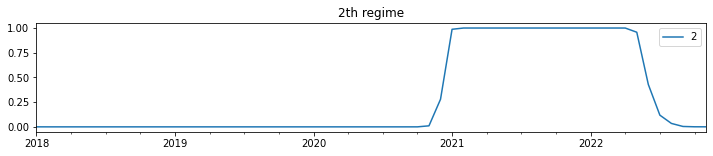

In [ ]:
# Show three regimes using smoothed marginal probabilities
for i in range(3):
  f, ax = plt.subplots(figsize=(12,2))
  res_btc.smoothed_marginal_probabilities[i].plot(
      label = f'{i}'
  )
  ax.set_title(f"{i}th regime")
  plt.legend()
  plt.show()

In [ ]:
print(res_btc.expected_durations)

[40.1389645  17.41000053 14.9425508 ]


In [ ]:
for i in res_btc.expected_durations:
 print(f"{i/12} Year")

3.3449137079954028 Year
1.450833377321546 Year
1.245212566340642 Year


## **S&P 500:**

In [ ]:
# Import dataset
response_sp = requests.get('https://docs.google.com/spreadsheets/d/1Y8Yv2qW5DH8gzkg8pRprBFRZ1asl1sXtT2Wkd6T0nzk/export?format=csv')
assert response_sp.status_code == 200, 'Wrong status code'
data = response_sp.content
df_sp = pd.read_csv(BytesIO(data))
print(df_sp.shape)


(1237, 6)


In [ ]:
#Convert to dataframe:
df_sp['Date'] = pd.to_datetime(df_sp['Date'])

#Check null value:
df_sp['Date'].isna().sum()

0

In [ ]:
# Change data to weekly format
weekly_sp = df_sp.resample('W-Fri', label='right', 
                            closed='right', on='Date').sum().reset_index().sort_values(by='Date')
weekly_sp

,Date,Open,High,Low,Close,Volume
0,2018-01-05,10832.22,10883.00,10827.12,10876.01,0
1,2018-01-12,13762.52,13813.86,13743.94,13801.03,0
2,2018-01-19,11188.95,11230.74,11137.66,11187.31,0
3,2018-01-26,14183.35,14249.67,14140.64,14221.76,0
4,2018-02-02,14157.75,14192.51,14055.46,14083.88,0
...,...,...,...,...,...,...
252,2022-11-04,19136.77,19246.89,18872.65,18978.21,0
253,2022-11-11,19232.28,19451.36,19099.91,19332.78,0
254,2022-11-18,19846.85,19955.12,19706.43,19819.67,0
255,2022-11-25,15922.34,16035.68,15887.54,16006.90,0


In [ ]:
# Change data to Monthly format
monthly_sp = df_sp.resample('M', label='right', 
                            closed='right', on='Date').sum().reset_index().sort_values(by='Date')
monthly_sp

,Date,Open,High,Low,Close,Volume
0,2018-01-31,58499.42,58724.90,58332.15,58585.88,0
1,2018-02-28,51495.12,51986.08,50953.47,51397.95,0
2,2018-03-31,56865.06,57231.75,56386.29,56758.25,0
3,2018-04-30,55803.01,56134.23,55368.99,55726.13,0
4,2018-05-31,59355.84,59620.65,59102.58,59432.86,0
5,2018-06-30,57854.40,58051.62,57627.77,57841.41,0
6,2018-07-31,58577.24,58813.95,58420.45,58666.51,0
7,2018-08-31,65655.29,65883.31,65514.37,65729.87,0
8,2018-09-30,55129.83,55289.94,54981.17,55128.51,0
9,2018-10-31,64309.74,64696.34,63619.23,64065.69,0


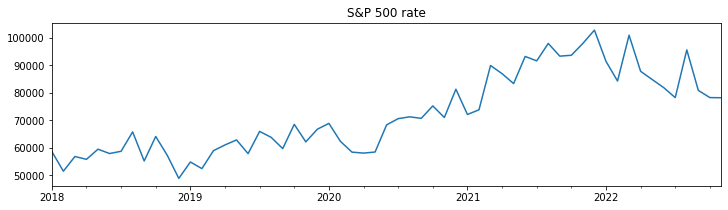

In [ ]:
from datetime import date, timedelta
import calendar
sp_list = monthly_sp['Close'].tolist()

#Draw the graph for S&P 500
date = datetime.now()
month = date.replace(day = calendar.monthrange(date.year, date.month)[1])
#d1 = today.strftime("%m/%d/%y")
sp_m = pd.Series(sp_list, index= pd.date_range("1/1/2018","11/30/2022", freq = "M"))
sp_m.plot(title="S&P 500 rate", figsize= (12,3))


In [ ]:
# print(55.85400626/4) 
# print(19.85506546/4)

In [ ]:
# Build up Markov model:
mod_sp = sm.tsa.MarkovRegression(sp_m, k_regimes = 3)
res_sp = mod_sp.fit()
res_sp.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: Es

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:               MarkovRegression   Log Likelihood                -619.047
Date:                Fri, 09 Dec 2022   AIC                           1258.094
Time:                        22:18:47   BIC                           1278.869
Sample:                    01-31-2018   HQIC                          1266.204
                         - 11-30-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.893e+04   1837.262     32.072      0.000    5.53e+04    6.25e+04
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.091e+04   2382.297     25.568      0.000    5.62e+04    6.56e+04
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.183e+04   1494.033     54.773      0.000    7.89e+04    8.48e+04
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.895e+07      0.187   2.62e+08      0.000     4.9e+07     4.9e+07
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.4152      0.000    844.740      0.000       0.414       0.416
p[1->0]        0.9557      0.053     18.176      0.000       0.853       1.059
p[2->0]     1.034e-96        nan        nan        nan         nan         nan
p[0->1]        0.5848   3.28e-06   1.79e+05      0.000       0.585       0.585
p[1->1]             0        nan        nan        nan         nan         nan
p[2->1]        0.0179      0.022      0.811      0.417      -0.025       0.061
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 6.4e+23. Standard errors may be unstable.
"""

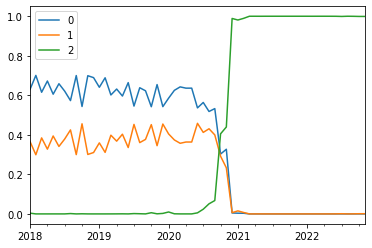

In [ ]:
# Show three regimes:
for i in range(3):
  res_sp.filtered_marginal_probabilities[i].plot(
      label = f'{i}'
  )
      
  plt.legend()

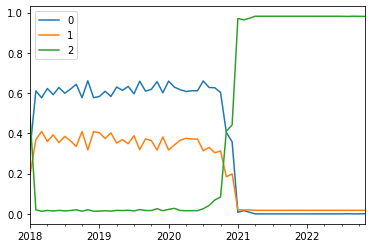

In [ ]:
# Show three regimes:
for i in range(3):
  res_sp.predicted_marginal_probabilities[i].plot(
      label = f'{i}'
  )
      
  plt.legend()

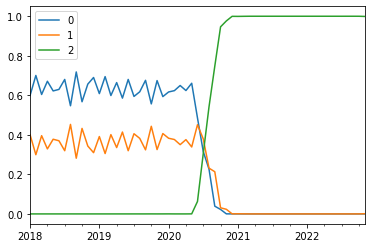

In [ ]:
# Show three regimes:
for i in range(3):
  res_sp.smoothed_marginal_probabilities[i].plot(
      label = f'{i}'
  )
      
  plt.legend()

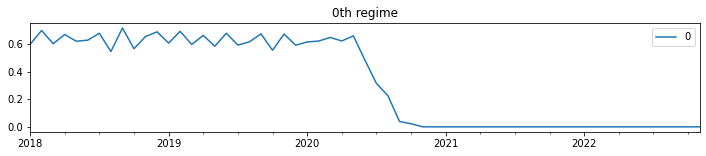

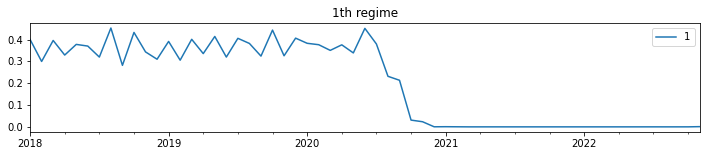

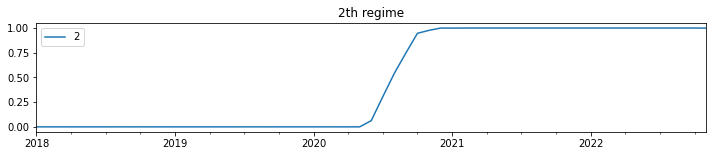

In [ ]:
for i in range(3):
  f, ax = plt.subplots(figsize=(12,2))
  res_sp.smoothed_marginal_probabilities[i].plot(
      label = f'{i}'
  )
  ax.set_title(f"{i}th regime")
  plt.legend()
  plt.show()

In [ ]:
print(res_sp.expected_durations)

[ 1.70999045  1.         55.76183427]


In [ ]:
for i in res_sp.expected_durations:
 print(f"{i/12} Year")


0.14249920380593648 Year
0.08333333333333333 Year
4.646819522209639 Year


### ***Model with volatility:***

In [ ]:
# Make trend='n' and switching_variance=True
vola_sp = sm.tsa.MarkovRegression(sp_m, k_regimes = 3,trend='n', switching_trend=False, switching_exog=False, switching_variance=True)
vola_res_sp = vola_sp.fit()
vola_res_sp.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: Es

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:               MarkovRegression   Log Likelihood                -744.910
Date:                Fri, 09 Dec 2022   AIC                           1507.820
Time:                        22:18:50   BIC                           1526.517
Sample:                    01-31-2018   HQIC                          1515.119
                         - 11-30-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.419e+09   1.37e-24   3.97e+33      0.000    5.42e+09    5.42e+09
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.419e+09    1.2e-11   4.52e+20      0.000    5.42e+09    5.42e+09
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       5.42e+09   2.79e-12   1.94e+21      0.000    5.42e+09    5.42e+09
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]         1e-20    232.648    4.3e-23      1.000    -455.982     455.982
p[1->0]         1e-20   3.06e-06   3.27e-15      1.000   -5.99e-06    5.99e-06
p[2->0]         1e-20        nan        nan        nan         nan         nan
p[0->1]        1.0000      3.181      0.314      0.753      -5.234       7.234
p[1->1]        0.0110      0.006      1.699      0.089      -0.002       0.024
p[2->1]        0.0011      3.845      0.000      1.000      -7.534       7.537
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 1.35e+60. Standard errors may be unstable.
"""

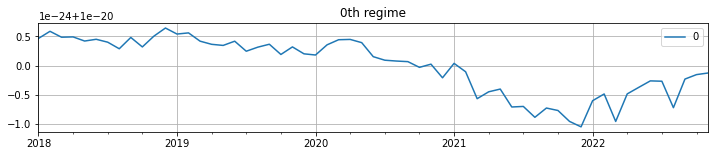

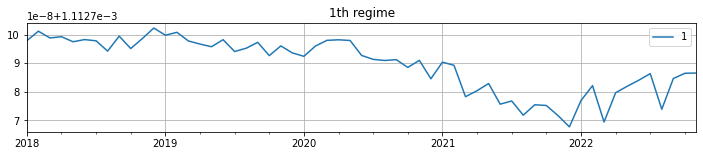

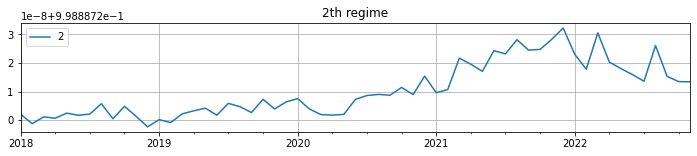

In [ ]:
for i in range(3):
  f, ax = plt.subplots(figsize=(12,2))
  vola_res_sp.smoothed_marginal_probabilities[i].plot(
      label = f'{i}'
  )
  ax.set_title(f"{i}th regime")
  plt.legend()
  plt.grid()
  plt.show()

In [ ]:
print(1e-8+9.988872e-1 )

0.99888721


In [ ]:
print(1e-8+1.1127e-3)

0.00111271


0th regime's negative probability => could be numerical error 
covarience number could be huge


AttributeError: ignored

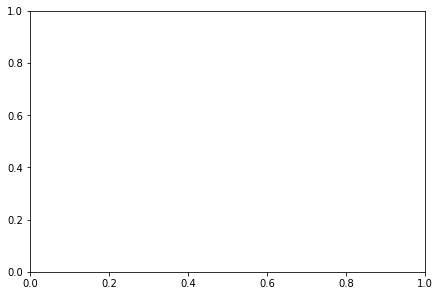

In [ ]:
fig, ax = plt.subplots(1, constrained_layout=True)
data_ret = data.resample('W').last().pct_change().dropna() * 100 # Get weekly returns in percent change
data_ret.plot(title='Excess returns', figsize=(12, 3), ax=ax)
ax.fill_between(usrec.index, ax.get_ylim()[0], ax.get_ylim()[1], where=usrec["USREC"].values, color="k", alpha=0.1)
# fig.tight_layout()

In [ ]:
print(vola_res_sp.expected_durations)

It's good to use k_regimes = 3 at this point. 
Not actually classifying as regime right now. 
All the probability is in regime => labling regimes is the next step
Labling Maximun probability Regime would be currently best idea. 

Probabilities time steps within the regime
1th, 2nd All the y values are 0. ( above there were only 3 liines  even though regime where 5) => didn't evene shouw up. So the three regimes would be optimal number. None zero (0th, 3th, 4th)  1th even though there are movement, y value is so small.

 reuse plotting code and the ideas i shared for volatility regime fitting. the only difference is you're fitting based on variance instead of the raw value trends. everything else is the same (regime probabilities, etc.)



This is fitting to local optimal.
The result is not significantly different with 5. But randomize process is needed? 

*****Explore why it's different.(with k_regime = 5) *******
ex) 4 or...3.. 5... 

Rerun multiple time to see if the results are different. (5 & 3) 
=> comes up with very different results. 

+ additionally we can figure it out, how they are different quantatively. 
(labeling...etc....) 



### *Model based on the volatility:* 
        #switching_trend=False, switching_exog=True, switching_variance=True,
        Do the resampling 
        USD- > Percentage change 
  
  
  ****** trend=’n’, switching_variance=True *******
  [link text](https://)

Switching intercept and lagged dependent variable

## **Taylor rule with 2 or 3 regimes**

Taylor-type rule with both 2 and 3 regimes to see which fits the data better. 
We employ a search over starting parameters to improve results, specifying 20 random search repetitions. 
* Seems like we have only 1 regime.

We now include two additional exogenous variables - a measure of the gap and a measure of inflation - into the S&P 500 data to estimate a switching Taylor-type rule with 3 regimes (which is better to fit in the data).

***Import inflation rate data csv file:***

In [ ]:
# Import inflation csv file
response = requests.get('https://docs.google.com/spreadsheets/d/17v0th71AL_VSSZeIBlsSi2rHEY6R6t_Or8os5GUW260/export?format=csv')
assert response.status_code == 200, 'Wrong status code'
data = response.content
inflation = pd.read_csv(BytesIO(data))
print(inflation.shape)

In [ ]:
# Change date to formal format:
inflation['DATE'] = pd.to_datetime(inflation['DATE'])
inflation.head()

In [ ]:
# Select only inflation rate from January 2018 to June 2022:
inflation_new = inflation.loc[inflation['DATE']>"2017-12-01"][inflation['DATE']<"2022-8-01"]
inflation_new.head()

***Change the S&P 500 data into monthly format:***

In [ ]:
# Convert daily s&p data into monthly:
monthly_sp = df_sp.resample('M', label='right', 
                            closed='right', on='Date').sum().reset_index().sort_values(by='Date')
# Drop 2022-10-30 data because the inflation rate did not come out yet.
monthly_sp = monthly_sp.drop(labels=[55,56,57,58],axis=0)
monthly_sp.head()

In [ ]:
#Make the monthly sp data into list
sp_listm = monthly_sp['Close'].tolist()

sp = pd.Series(sp_listm, index= pd.date_range("1/1/2018",'07/31/2022', freq = "M"))

***Import GDP csv file and change it to monthly format:***

In [ ]:
# Import GDP csv file
response = requests.get('https://docs.google.com/spreadsheets/d/1tYgpA_dlxhMhbaRZ2wxuQA8TIox-h3vAPn_Yd01kgLA/export?format=csv')
assert response.status_code == 200, 'Wrong status code'
data = response.content
gdp = pd.read_csv(BytesIO(data))
print(gdp.shape)

In [ ]:
gdp['DATE'] = pd.to_datetime(gdp['DATE'])

# Select data from 2018 to 2022:
gdp_new = gdp.loc[gdp['DATE']>"2017-12-01"][gdp['DATE']<"2022-08-01"]
gdp_new.head()

In [ ]:
gdp_new['DATE'] = pd.to_datetime(gdp['DATE']).dt.to_period('M')

# Change the quarterly data to monthly and use interpolate method to fill in the null data using linear calculation method
monthly_gdp = gdp_new.set_index('DATE').resample('M').interpolate(method='linear')
monthly_gdp = monthly_gdp.reset_index()
monthly_gdp.head()

In [ ]:
gdp_list = monthly_gdp['GDP'].tolist()
inflation_list = inflation_new['T10YIEM'].tolist()

gdp = pd.Series(gdp_list, index= pd.date_range("1/1/2018",'08/01/2022', freq = "M"))
inflation = pd.Series(inflation_list, index= pd.date_range("1/1/2018",'08/01/2022', freq = "M"))

In [ ]:
# Combine s&p 500, gdp, and inflation data:
exog = pd.concat((sp.shift(), gdp, inflation), axis=1).iloc[1:]
exog.head()

In [ ]:
# Build up the model using taylor rule
mod_taylor = sm.tsa.MarkovRegression(sp.iloc[1:], k_regimes=3, exog=exog)
res_taylor = mod_taylor.fit()
res_taylor.summary()

In [ ]:
for i in range(3):
  f, ax = plt.subplots(figsize=(12,2))
  res_taylor.smoothed_marginal_probabilities[i].plot(
      label = f'{i}'
  )
  ax.set_title(f"{i}th regime")
  plt.legend()
  plt.show()

In [ ]:
print(res_taylor.expected_durations)

In [ ]:
print(res_taylor.expected_durations /12)

## Using RNN Model

Making RNN model predicting BitCoin Data 


In [ ]:
# https://docs.google.com/spreadsheets/d/164npbvm4g4I3noNGH_wDJe6tRgErkfwNUUbcktXf2LY/edit?usp=sharing
# Import dataset
response_btcoin = requests.get('https://docs.google.com/spreadsheets/d/164npbvm4g4I3noNGH_wDJe6tRgErkfwNUUbcktXf2LY/export?format=csv')
assert response_btcoin.status_code == 200, 'Wrong status code'
data = response_btcoin.content
df_btcoin = pd.read_csv(BytesIO(data))
print(df_btcoin.shape)

#Convert to dataframe:
df_btcoin['Date'] = pd.to_datetime(df_btcoin['Date'])

#Check null value:
df_btcoin['Date'].isna().sum()

(1803, 6)


0

In [ ]:
#Resample df by daily
daily_btc = df_btcoin.resample('D', label='right', 
                            closed='right', on='Date').sum().reset_index().sort_values(by='Date')

In [ ]:
daily_btc.head()

,Date,Open,High,Low,Close,Volume
0,2018-01-02,0.0,0.0,0.0,13480.01,0.0
1,2018-01-03,0.0,0.0,0.0,14781.51,0.0
2,2018-01-04,0.0,0.0,0.0,15098.14,0.0
3,2018-01-05,0.0,0.0,0.0,15144.99,0.0
4,2018-01-06,0.0,0.0,0.0,16960.01,0.0


In [ ]:
#trim the df
trimed_df = daily_btc[['Date', 'Close']]
trimed_df

,Date,Close
0,2018-01-02,13480.01
1,2018-01-03,14781.51
2,2018-01-04,15098.14
3,2018-01-05,15144.99
4,2018-01-06,16960.01
...,...,...
1798,2022-12-05,17131.40
1799,2022-12-06,16964.90
1800,2022-12-07,17087.80
1801,2022-12-08,16841.10


In [ ]:
#Splitting dataset with test vs (train + validation)
size = len(trimed_df)
split_test = 0.1
test_size = int( size * 0.1)
print(test_size)
print(test_size*2)

180
360


In [ ]:
train = trimed_df[:size-(test_size)*2]
train

,Date,Close
0,2018-01-02,13480.01
1,2018-01-03,14781.51
2,2018-01-04,15098.14
3,2018-01-05,15144.99
4,2018-01-06,16960.01
...,...,...
1438,2021-12-10,47824.30
1439,2021-12-11,46968.50
1440,2021-12-12,49343.10
1441,2021-12-13,50149.20


In [ ]:
valid = trimed_df[size-(test_size)*2:size-(test_size)]
valid

,Date,Close
1443,2021-12-15,48392.0
1444,2021-12-16,48884.7
1445,2021-12-17,47634.2
1446,2021-12-18,46155.3
1447,2021-12-19,46928.3
...,...,...
1618,2022-06-08,31148.3
1619,2022-06-09,30177.0
1620,2022-06-10,30079.6
1621,2022-06-11,29063.1


In [ ]:
test = trimed_df[size-(test_size):]
test

,Date,Close
1623,2022-06-13,26555.0
1624,2022-06-14,22494.3
1625,2022-06-15,22120.2
1626,2022-06-16,22562.3
1627,2022-06-17,20369.9
...,...,...
1798,2022-12-05,17131.4
1799,2022-12-06,16964.9
1800,2022-12-07,17087.8
1801,2022-12-08,16841.1


In [ ]:
#reshape train data
train_data= train.loc[:,['Close']].values
print(train.shape)
train_data = np.reshape(train_data, (-1, 1))
print(train_data.shape)

(1443, 2)
(1443, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train_scaled = scaler.fit_transform(train_data)
train_scaled.shape

(1443, 1)

In [ ]:
train_size = len(train_scaled)
train_size

1443

In [ ]:
X_train = []
y_train = []
n_steps = 50
for i in range(n_steps, train_size) :
  X_train.append(train_scaled[i-n_steps:i, 0])
  y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)

(1393, 50) (1393,)


In [ ]:
#reshape the dataseet for model 3D array, 2D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1 ))
y_train = np.reshape(y_train, (y_train.shape[0], 1))
print(X_train.shape, y_train.shape)

(1393, 50, 1) (1393, 1)


In [ ]:
#reshape valid data
#scaling valid 
valid_data= valid.loc[:,['Close']].values
print(valid.shape)
valid_data = np.reshape(valid_data, (-1, 1))
print(valid_data.shape)

(180, 2)
(180, 1)


In [ ]:
valid_scaled = scaler.fit_transform(valid_data)
valid_scaled.shape

(180, 1)

In [ ]:
valid_size = len(valid_scaled)
X_valid = []
y_valid = []
n_steps = 50
for i in range(n_steps, valid_size) :
  X_valid.append(valid_scaled[i-n_steps:i, 0])
  y_valid.append(valid_scaled[i,0])

X_valid, y_valid = np.array(X_valid), np.array(y_valid)
print(X_valid.shape, y_valid.shape)

(130, 50) (130,)


In [ ]:
#reshape the dataseet for model 3D array, 2D array
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1],1 ))
y_valid = np.reshape(y_valid, (y_valid.shape[0], 1))
print(X_valid.shape, y_valid.shape)

(130, 50, 1) (130, 1)


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#declaire model and adding layers
model = keras.models.Sequential()

model.add(keras.layers.SimpleRNN(10, return_sequences = True, activation = "tanh", input_shape= (X_train.shape[1],1)))
model.add(keras.layers.SimpleRNN(10))
model.add(Dense(units =1))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50, 10)            120       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 10)                210       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

#Fitting the model to train set
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 50, batch_size= 32)

Epoch 1/50
44/44 [==============================] - 3s 26ms/step - loss: 0.0140 - accuracy: 0.0014 - val_loss: 0.0141 - val_accuracy: 0.0077
Epoch 2/50
44/44 [==============================] - 1s 18ms/step - loss: 0.0021 - accuracy: 0.0014 - val_loss: 0.0185 - val_accuracy: 0.0077
Epoch 3/50
44/44 [==============================] - 1s 19ms/step - loss: 0.0015 - accuracy: 0.0014 - val_loss: 0.0118 - val_accuracy: 0.0077
Epoch 4/50
44/44 [==============================] - 1s 18ms/step - loss: 0.0012 - accuracy: 0.0014 - val_loss: 0.0086 - val_accuracy: 0.0077
Epoch 5/50
44/44 [==============================] - 1s 20ms/step - loss: 9.5117e-04 - accuracy: 0.0014 - val_loss: 0.0070 - val_accuracy: 0.0077
Epoch 6/50
44/44 [==============================] - 1s 18ms/step - loss: 8.0904e-04 - accuracy: 0.0014 - val_loss: 0.0062 - val_accuracy: 0.0077
Epoch 7/50
44/44 [==============================] - 1s 19ms/step - loss: 6.9694e-04 - accuracy: 0.0014 - val_loss: 0.0063 - val_accuracy: 0.0077
E

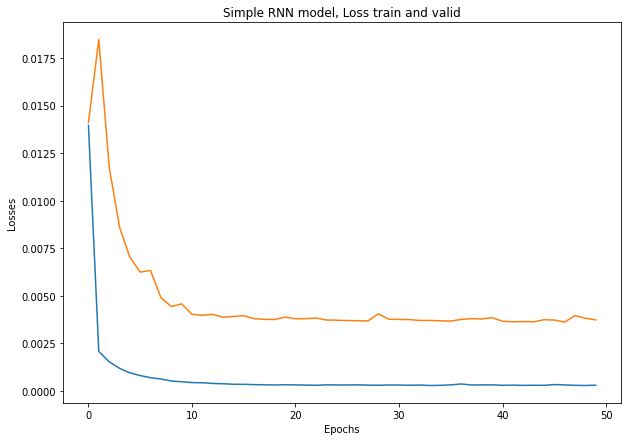

In [ ]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss train and valid")
plt.show()
#Seems like more epoch is needed stacatostic gradient method might be needed to find the optimal values. 

In [ ]:
y_pred = model.predict(X_train)
y_pred = scaler.inverse_transform(y_pred)
y_pred.shape 


44/44 [==============================] - 0s 5ms/step


(1393, 1)

In [ ]:
y_train = scaler.inverse_transform(y_train)
y_train.shape

(1393, 1)

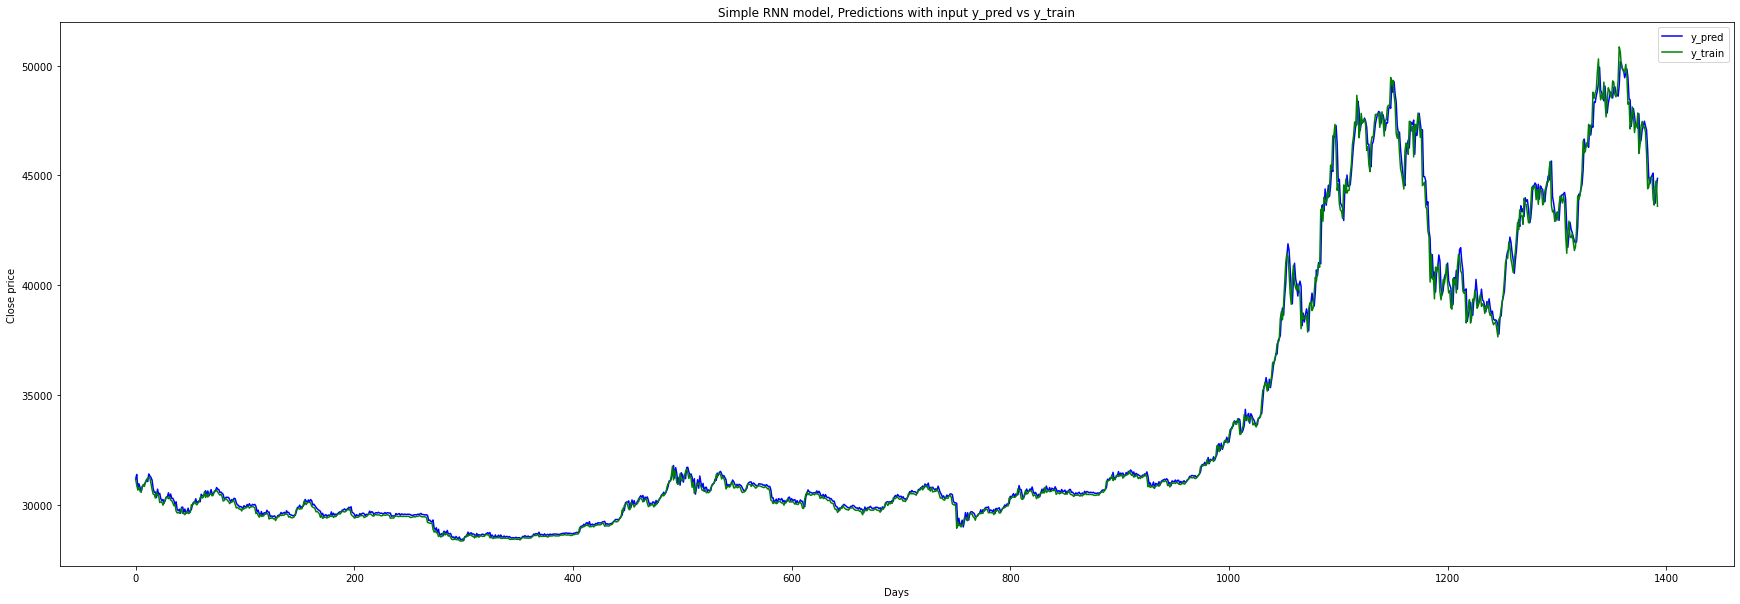

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Simple RNN model, Predictions with input y_pred vs y_train")
plt.legend()
plt.show()

In [ ]:
#Test data preprocessing
test_data= test.loc[:,['Close']].values
print(train.shape)
test_data = np.reshape(test_data, (-1, 1))
print(test_data.shape)
test_scaled = scaler.fit_transform(test_data)
print( test_scaled.shape);



(1443, 2)
(180, 1)
(180, 1)


In [ ]:
test_size = len(test_scaled)
X_test = []
y_test = []
for i in range(n_steps, test_size) :
  X_test.append(test_scaled[i-n_steps:i, 0])
  y_test.append(test_scaled[i,0])

X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape, y_test.shape)

(130, 50) (130,)


In [ ]:
#reshape the dataseet for model 3D array, 2D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1 ))
y_test = np.reshape(y_test, (y_test.shape[0], 1))
print(X_test.shape, y_test.shape)

(130, 50, 1) (130, 1)


In [ ]:
y_pred_test = model.predict(X_test)
y_pred_test = scaler.inverse_transform(y_pred_test)
print("Test dataset prediction: ", y_pred_test.shape)

5/5 [==============================] - 0s 6ms/step
Test dataset prediction:  (130, 1)


In [ ]:
y_test = scaler.inverse_transform(y_test)

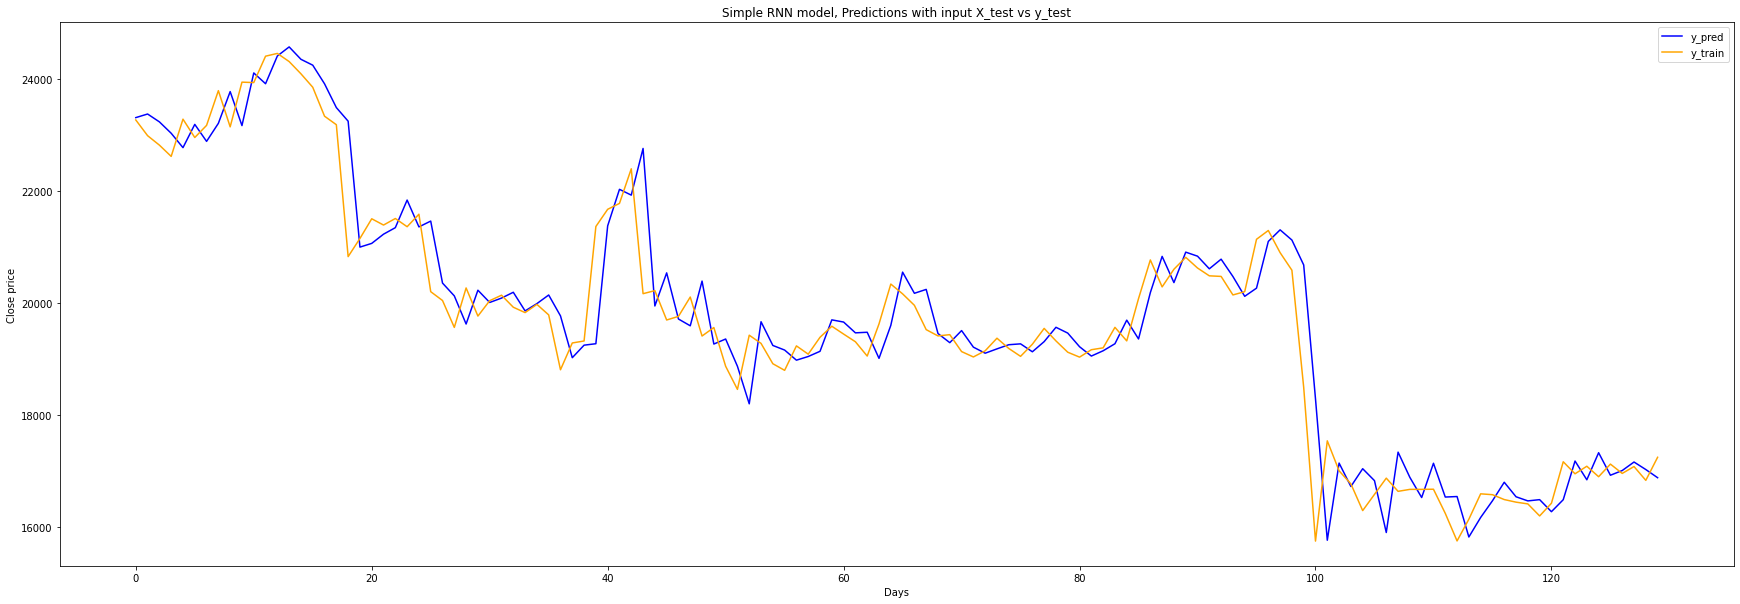

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(y_pred_test, color = "blue", label = "y_pred" )
plt.plot(y_test, color = "orange", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Simple RNN model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [ ]:
len(y_test)

130

In [ ]:
len(y_pred_test)

130

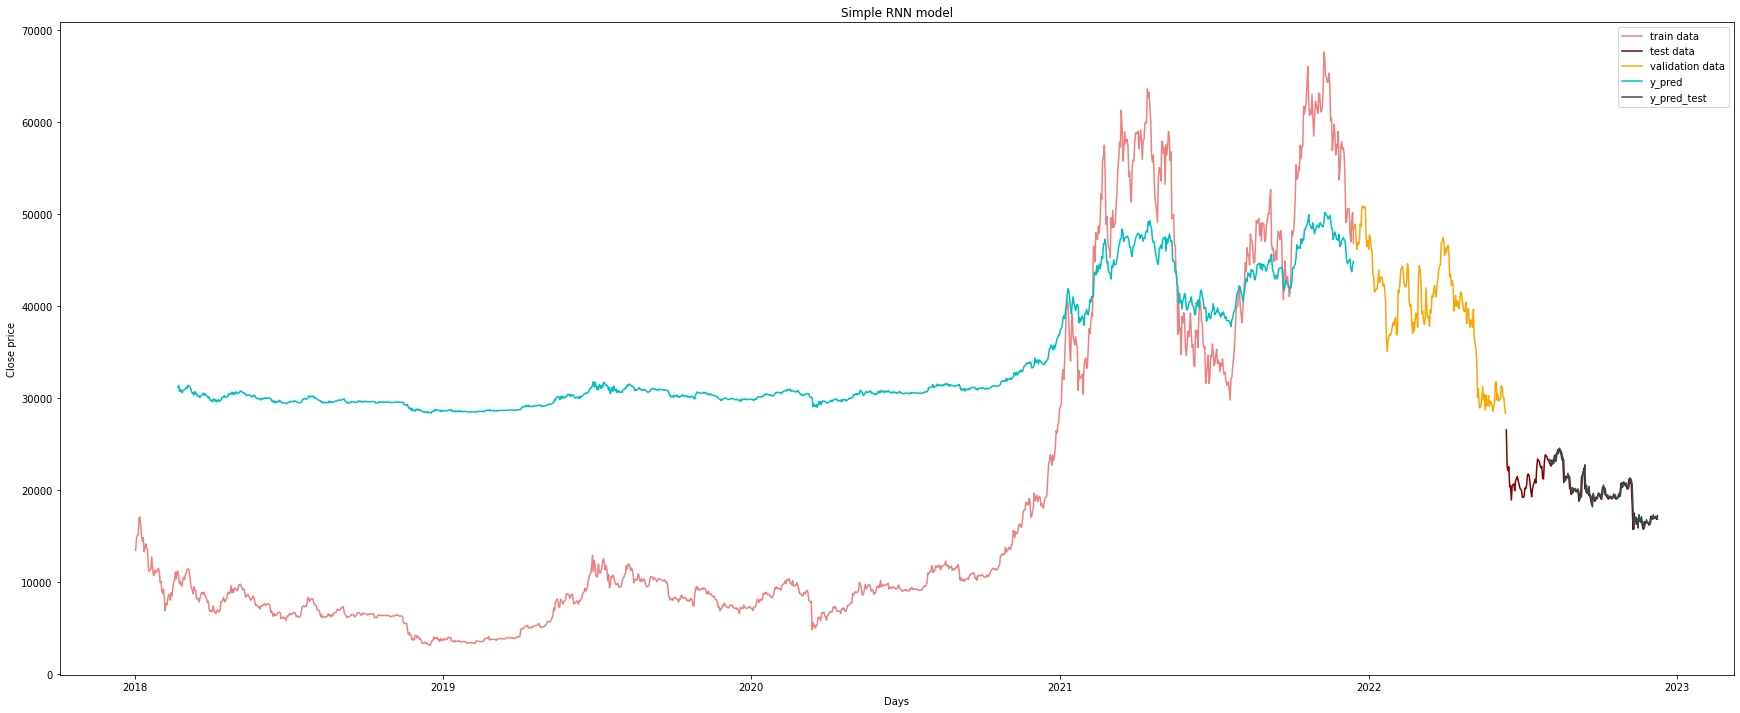

In [ ]:
plt.subplots(figsize = (30, 12))
plt.plot(train.Date, train.Close, label = "train data", color ='lightcoral' )
plt.plot(test.Date, test.Close, label = "test data", color = "maroon")
plt.plot(valid.Date, valid.Close,  label = "validation data", color ='orange' )
plt.plot(train.Date.iloc[n_steps:], y_pred, label = "y_pred", color = "c")
plt.plot(test.Date.iloc[n_steps:], y_pred_test, label="y_pred_test", color = "darkslategray")
# plt.plot(valid.Date.iloc[n_steps:], valid.Close,  label = "valid data", color ='orange' )

plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Simple RNN model")
plt.legend()
plt.show()

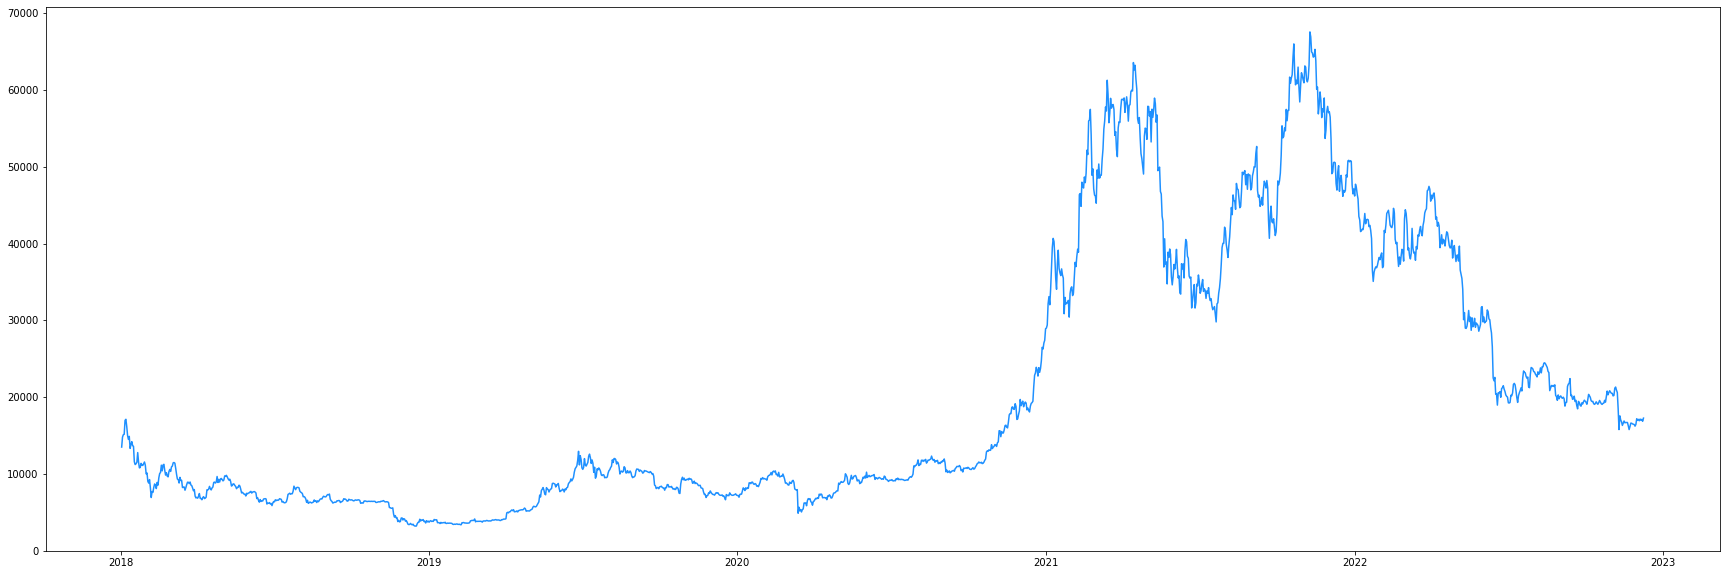

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(trimed_df.Date, trimed_df.Close, label = "y_pred", color = "dodgerblue")

In [ ]:
print( "Final prediction:" , y_pred_test[-1])

Final prediction: [16888.55]
